In [1]:
import sys
sys.path.append(r'C:\Users\kmm171\ImageAnalysis\caImageAnalysis')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import os
import pandas as pd
import matplotlib.gridspec as gridspec

#Local imports
from utilities.create_ColorDict import hex_to_RGB as hex_to_RGB
from natsort import natsort_keygen, natsorted
from fishy import WorkingFish, BaseFish, VizStimFish
import stimuli

In [2]:
%store -r fishpaths fishSchool responses_fishSchool errors_fishSchool bool_df_fishSchool responders_bool_fishSchool responders_f_cells_fishSchool ops_fishSchool iscell_fishSchool stats_fishSchool f_cells_fishSchool offset stacked_resp_fishSchool offsetBaseline afterstim_frames colors_fishSchool cell_img_fishSchool responsive_neurons_fishSchool responsive_bool_fishSchool responsive_cell_img_fishSchool neurons_xypos WMR_unfed_fishSchool normsavgs_fishSchool avgs_fishSchool stacked_resp_fishSchool stacked_responsive_fishSchool

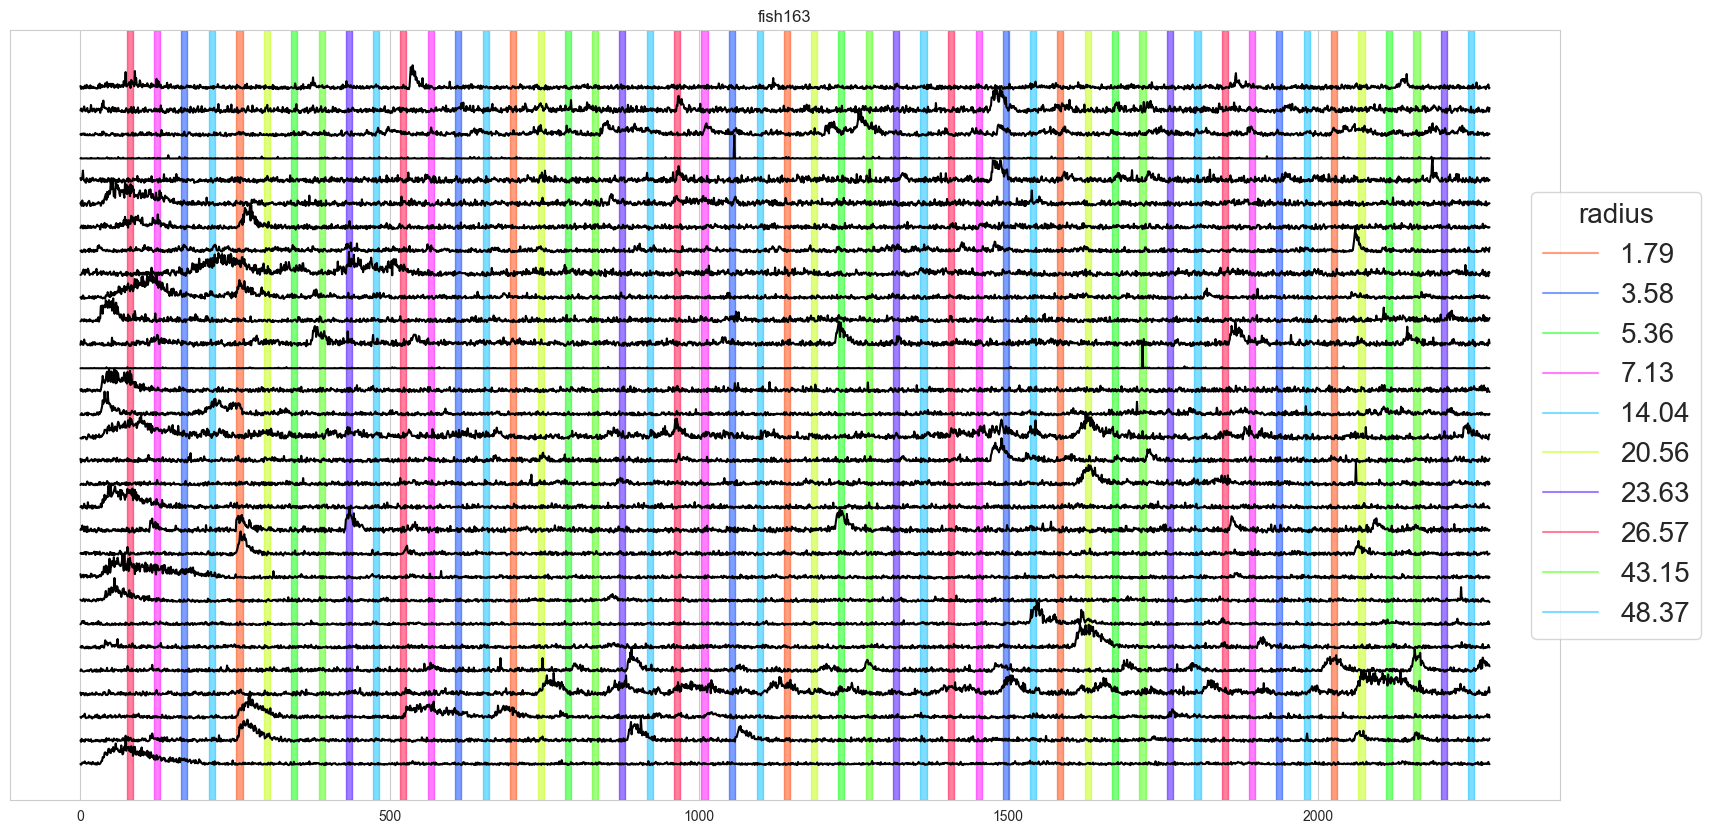

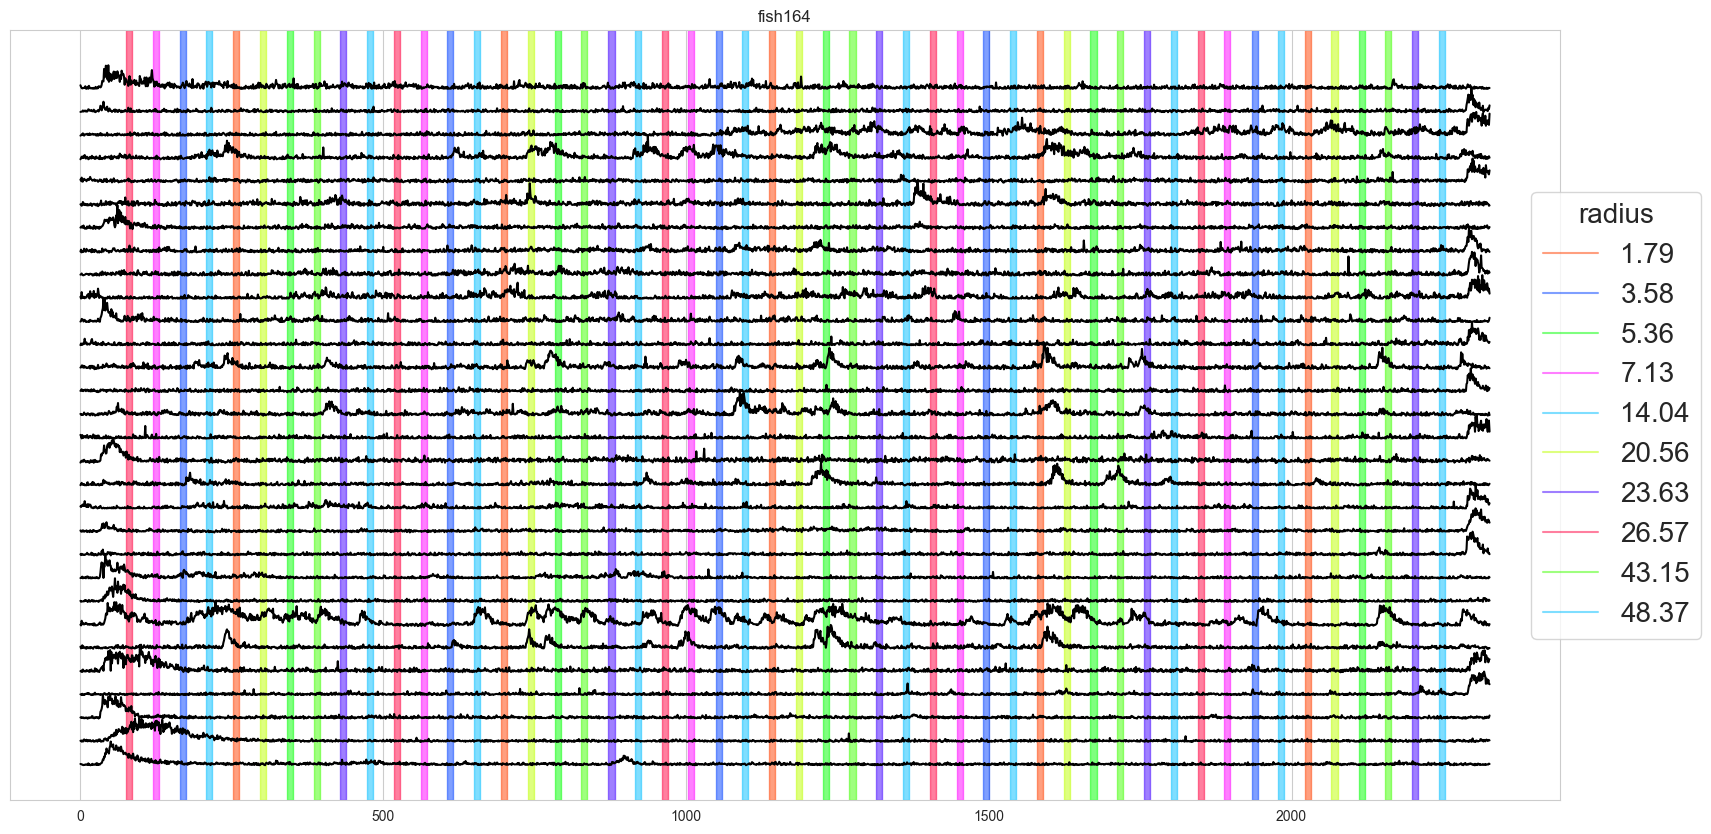

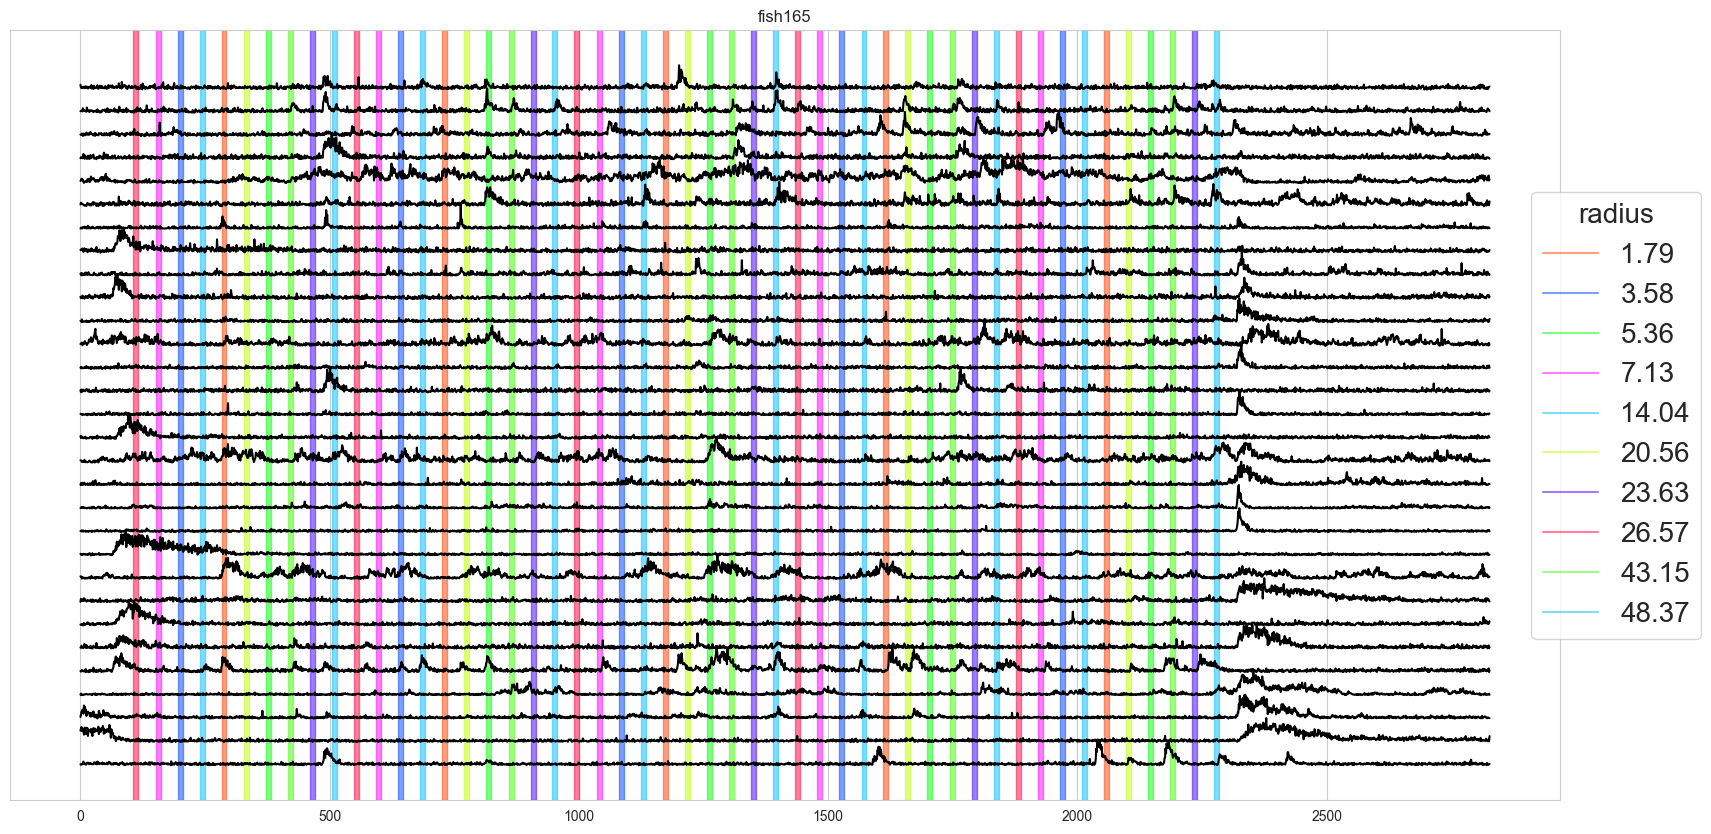

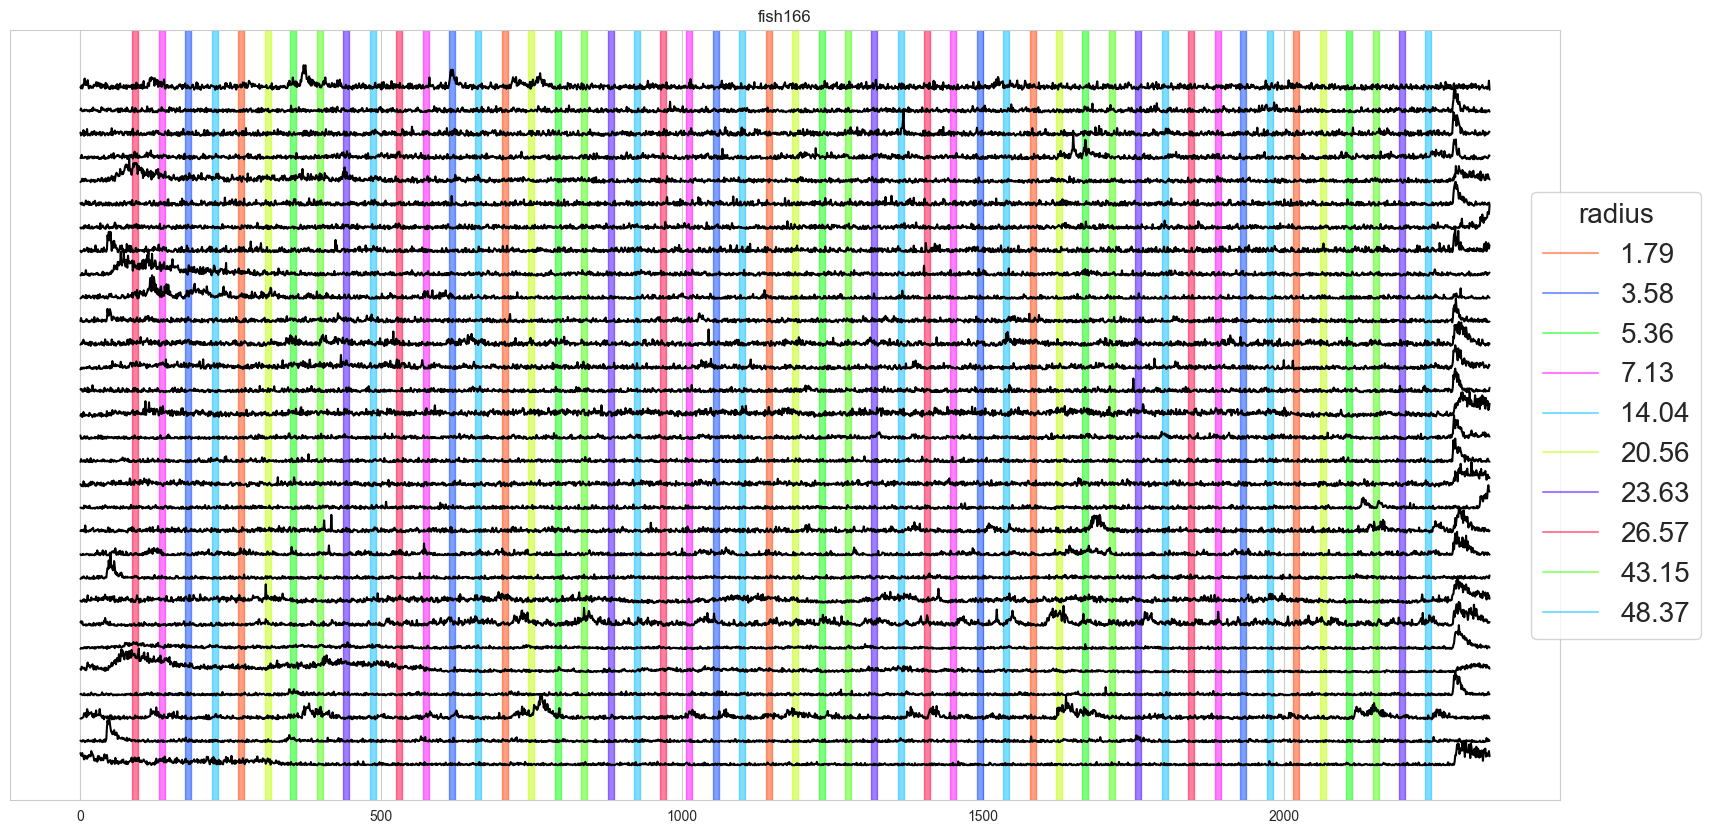

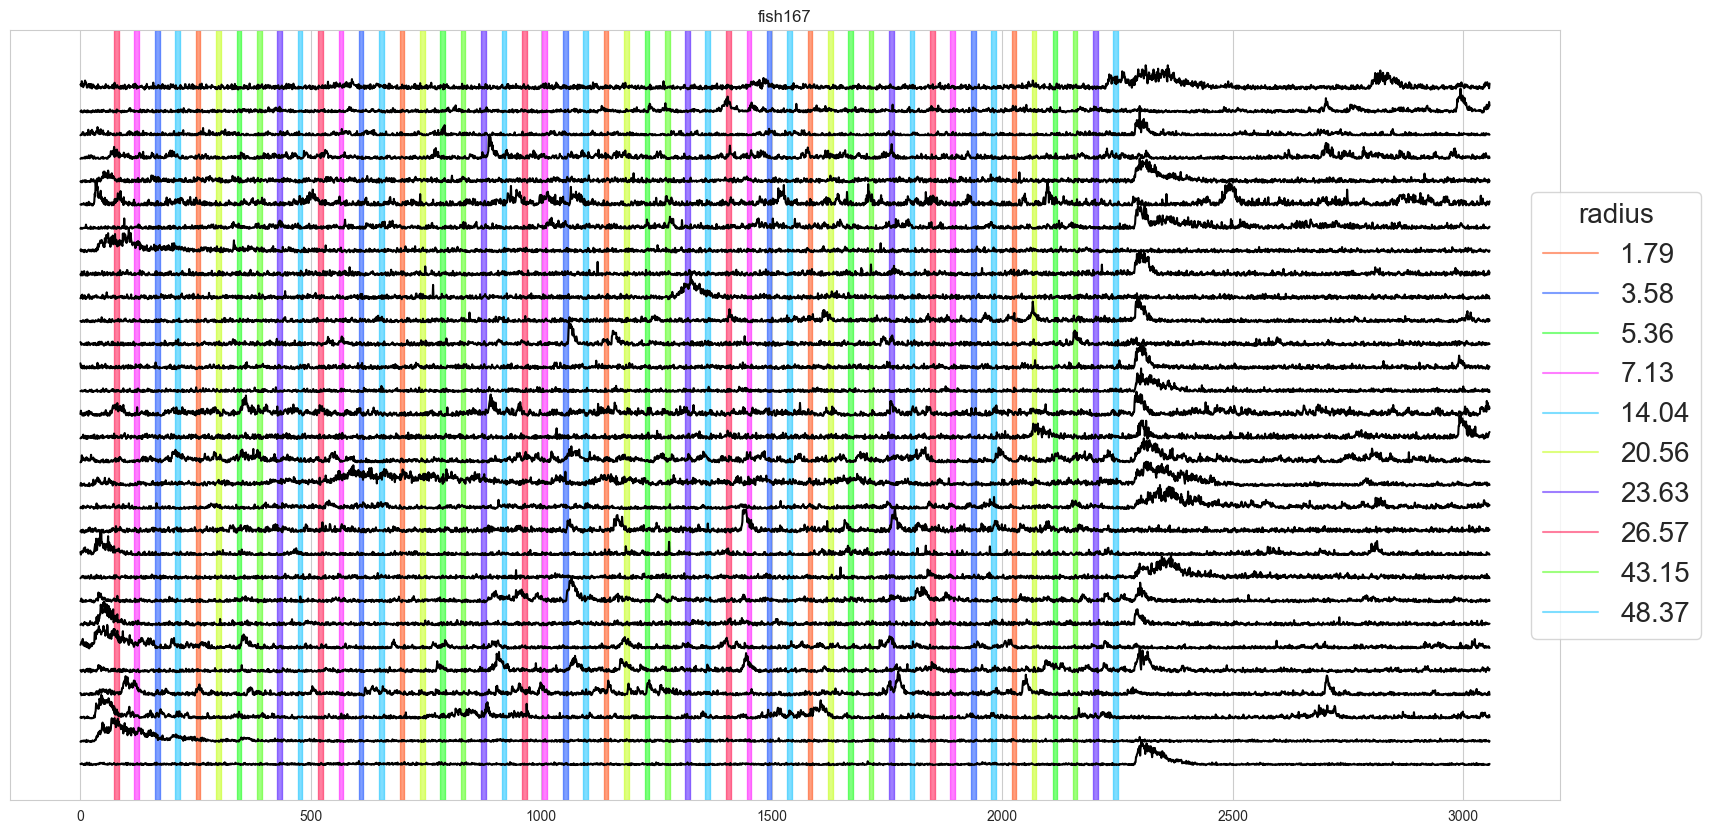

In [3]:
for key, stack in fishSchool.items():
    motion_frames = stack.stimulus_df_condensed['motion_frame']
    stimmies = stack.stimulus_df_condensed['stim_name']

    data = f_cells_fishSchool #{f_cells_fishSchool, responders_f_cells_fishSchool}

    if len(data[key]) > 20:
        rangenrns = len(data[key][0:30])
    elif len(data[key]) <= 20:
        rangenrns =  len(data[key])
    else:
        pass
        print(f'{key} is empty')

    plt.figure(figsize=(20,10))
    for z in range(rangenrns):
        plt.plot(np.arange(len(data[key].iloc[z])), data[key].iloc[z]/data[key].iloc[z].max() + z, color="black")

    for frame, stimmy in zip(motion_frames, stimmies):
        plt.axvspan(frame, frame + offset , color=colors_fishSchool[key][str(stimmy)]) #+ 0.20

    #plt.xlim(0, 1800)

    legend_lines = [Line2D([0], [0], color=clr) for clr in colors_fishSchool[key].values()]
    legend_labels = [str(label) for label in colors_fishSchool[key].keys()]

    plt.title(f'{key}')
    plt.legend(legend_lines, legend_labels, title="radius", loc='center right', bbox_to_anchor=(1.1,0.5),title_fontsize=20, fontsize=20,
               markerscale=5)
    plt.yticks([])
    plt.show()



In [4]:
def tsplot(ax, data,**kw):
    data = pd.DataFrame(data)
    x = np.arange(data.shape[1]) #number of columns
    avg = data.mean(axis=0) #get the mean across columns
    sd = data[data!=0].std()
    SEM = data.sem(axis=0)
    cis = (avg - SEM, avg + SEM)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,avg,**kw)
    ax.margins(x=0)

In [5]:
fishSchool

{'fish163': <main.main_improv2.Fish at 0x243051a30d0>,
 'fish164': <main.main_improv2.Fish at 0x2431b8c86a0>,
 'fish165': <main.main_improv2.Fish at 0x2431b9e6c70>,
 'fish166': <main.main_improv2.Fish at 0x2431bab3100>,
 'fish167': <main.main_improv2.Fish at 0x2431bb59c70>}

## raw average with error bars as SEM

In [ ]:
key = 'fish165'
fish = fishSchool[key]
repetitions = fish.stimulus_df_condensed.stim_name.count()
num_stims = len(fish.stimulus_df_condensed.stim_name.unique())
num_trials = int(repetitions / num_stims)

color_dict = {}
for i in range(num_trials): #range(1,max_stim_size+1):
    color_dict[i] = sns.color_palette( n_colors=num_trials)[i]

data = stacked_responsive_fishSchool[key] #{stacked_resp_fishSchool, stacked_responsive_fishSchool}
booldata = responsive_bool_fishSchool[key]

rows_neurons = len(data.index.tolist())
cols_stim = len(colors_fishSchool[key])

plt.figure(figsize=(20,rows_neurons*1.5))

gs = gridspec.GridSpec(rows_neurons,cols_stim)
gs.update(hspace=0.3, wspace=0.05)

for i, (index, neuron), (idx, bool_neuron) in zip(range(rows_neurons), data.iterrows(), booldata.iterrows()):

    for j, (size, chunk), boolvalue in zip(range(cols_stim), neuron.items(), bool_neuron):

        ax = plt.subplot(gs[i,j]) #minisubplot

        for c, trace in enumerate(chunk):

            tsplot(ax, chunk)
            #ax.plot(trace, color=list(colors_fishSchool[key].values())[c], linewidth=1)
            #ax.set_yticks([])
            ax.set_xticks([])
            ax.set_ylim(0, 1.0)
            ax.grid(False)
            ax.set_frame_on(False)
            ax.label_outer()

            if boolvalue == 1:
                ax.xaxis.label.set_color('red')
                ax.set_xlabel(size, labelpad=0.5)
            else:
                ax.xaxis.label.set_color('blue')
                ax.set_xlabel(size, labelpad=0.5)

        ax.plot(chunk.mean(axis=0), color='black')
        ax.axvspan(offsetBaseline, offsetBaseline + 0.5, color='red', alpha=0.5)

    ax.text(40,0.5, f'{index}', color='black', bbox=dict(facecolor='none', edgecolor='black'))

plt.title(f'{key}', y=-1, fontsize=20)

## all neurons average + traces

Text(0.5, -1, 'fish164')

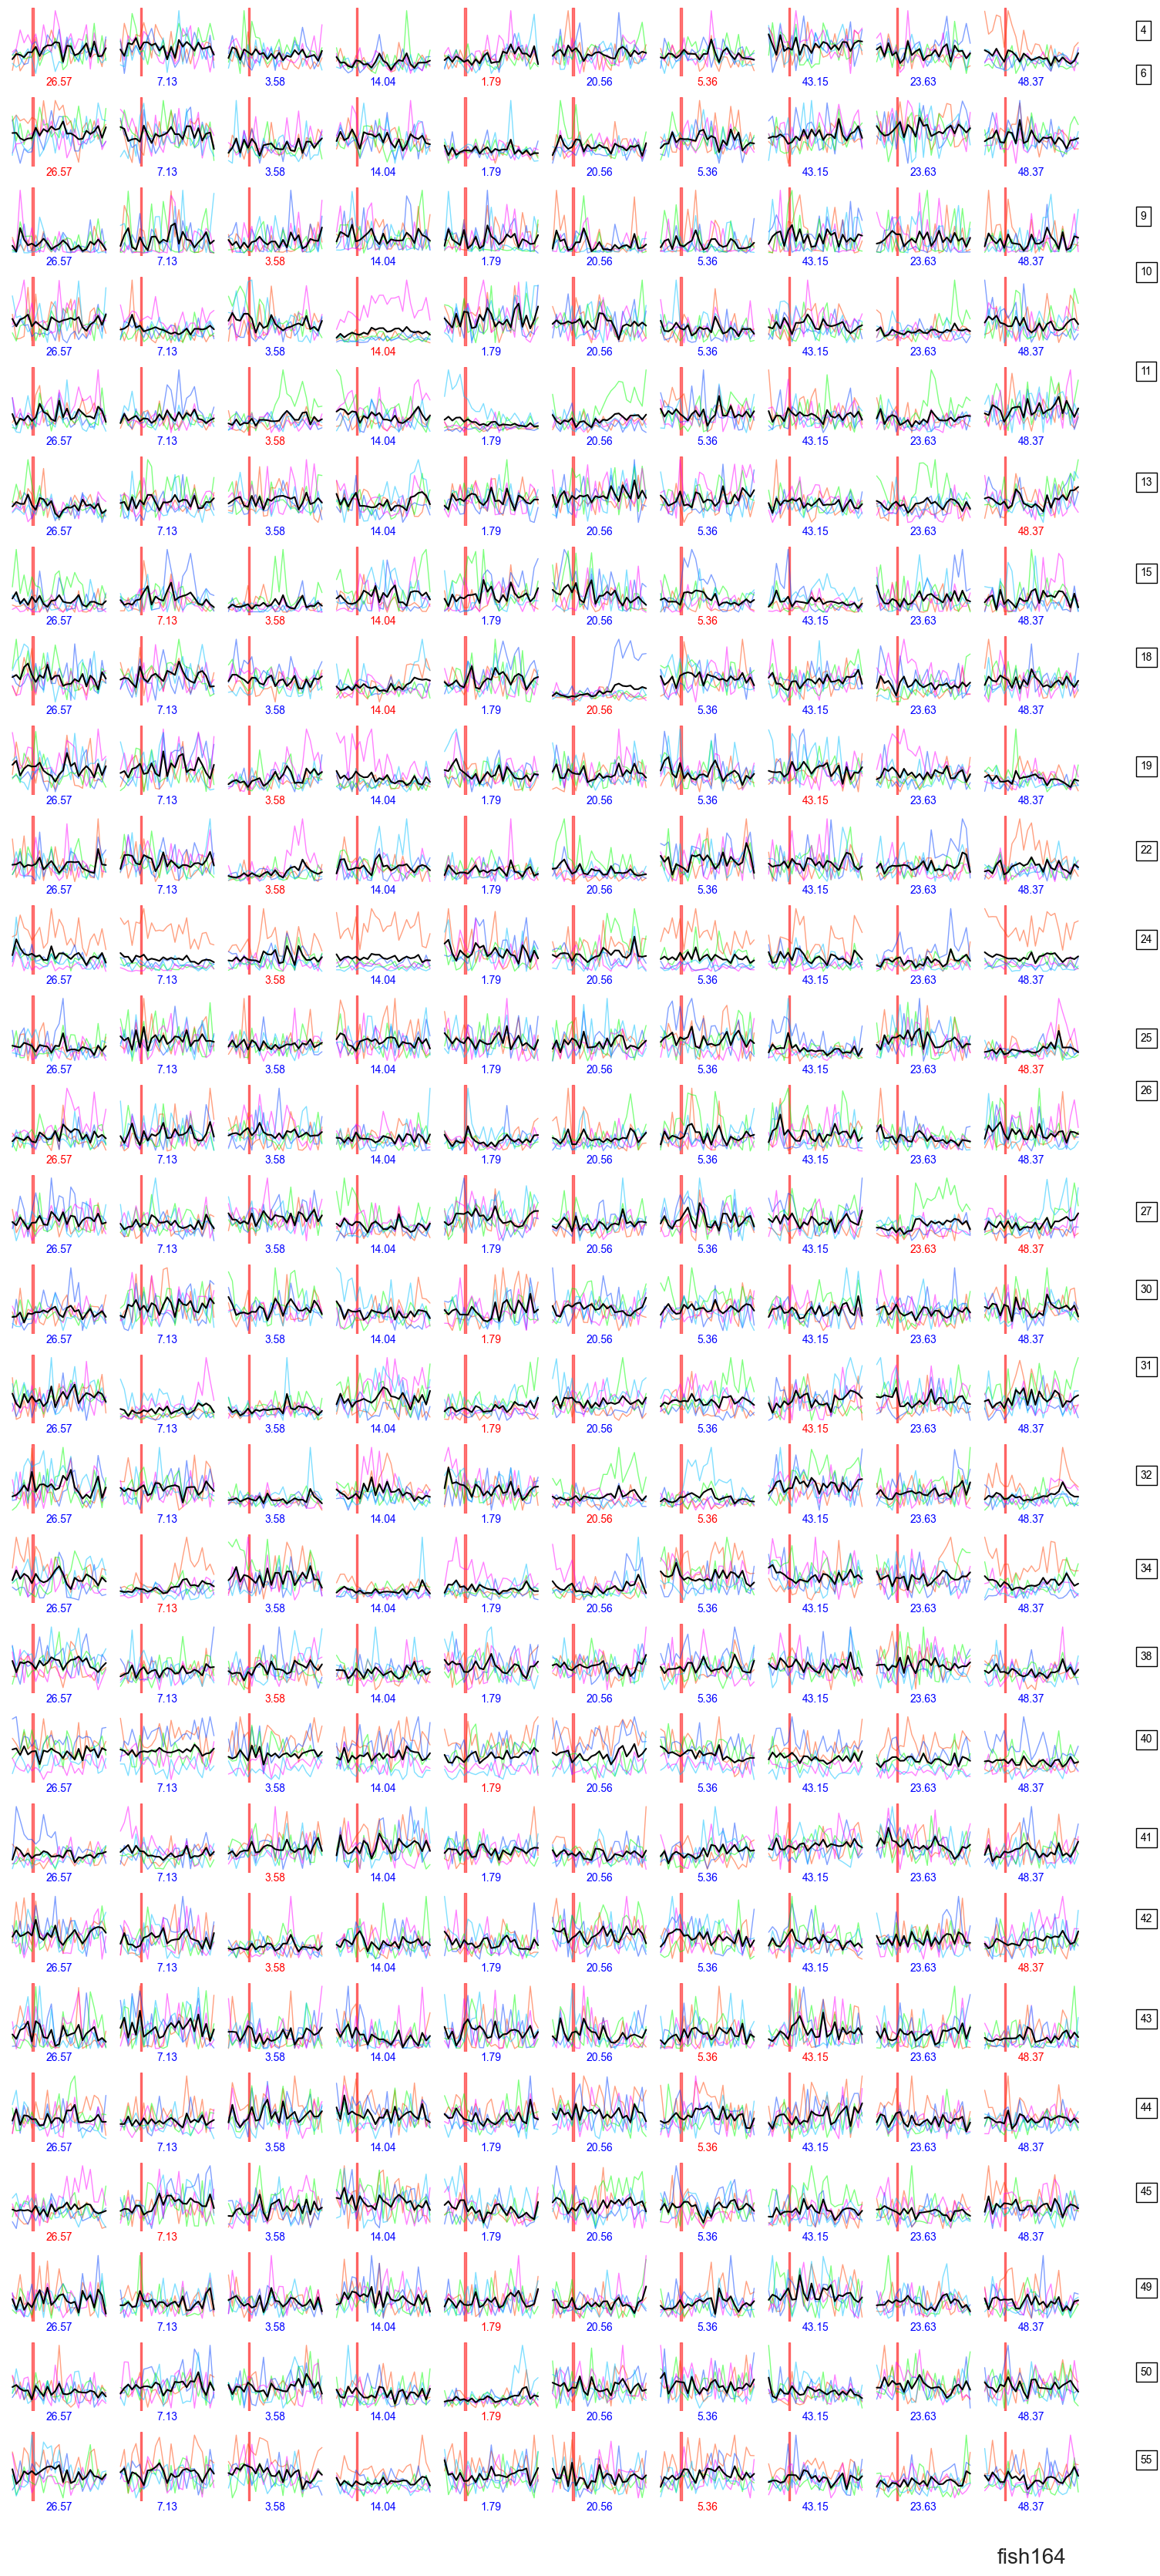

In [7]:

plt.figure(figsize=(18,rows_neurons*1.5))

gs = gridspec.GridSpec(rows_neurons,cols_stim)
gs.update(hspace=0.3, wspace=0.05)

for i, (idx, bool_neuron), (index, neuron) in zip(range(rows_neurons), booldata.iterrows(), data.iterrows()):

    if index in booldata.index: #only data because norrmneuron comes from responsive_bool_fishSchool indexes

        for j, boolvalue, (size, chunk) in zip(range(cols_stim), bool_neuron, neuron.items()):

            ax = plt.subplot(gs[i,j]) #minisubplot

            for c, trace in enumerate(chunk):

                ax.plot(trace, color=list(colors_fishSchool[key].values())[c], linewidth=1)
                ax.set_yticks([])
                ax.set_xticks([])
                #ax.set_ylim(-0.2, 1.1)
                ax.label_outer()
                ax.grid(False)
                ax.set_frame_on(False)

                if boolvalue == 1:
                    ax.xaxis.label.set_color('red')
                    ax.set_xlabel(size, labelpad=0.5)
                else:
                    ax.xaxis.label.set_color('blue')
                    ax.set_xlabel(size, labelpad=0.5)

            ax.plot(chunk.mean(axis=0), color='black')
            ax.axvspan(offsetBaseline, offsetBaseline + 0.5, color='red', alpha=0.5)

        ax.text(40,0.5, f'{index}', color='black', bbox=dict(facecolor='none', edgecolor='black'))

plt.title(f'{key}', y=-1, fontsize=20)